<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Take-notice!" data-toc-modified-id="Take-notice!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Take notice!</a></span></li><li><span><a href="#An-Open-Data-case-study:--Hot-spots-for-Arrests-in-LA-over-time" data-toc-modified-id="An-Open-Data-case-study:--Hot-spots-for-Arrests-in-LA-over-time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>An Open Data case study:  Hot-spots for Arrests in LA over time</a></span><ul class="toc-item"><li><span><a href="#What-is-an-API?" data-toc-modified-id="What-is-an-API?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>What is an API?</a></span></li><li><span><a href="#Mini-project:-Mapping-LA-metro-stops" data-toc-modified-id="Mini-project:-Mapping-LA-metro-stops-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mini project: Mapping LA metro stops</a></span></li><li><span><a href="#Data-acquisition" data-toc-modified-id="Data-acquisition-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data acquisition</a></span><ul class="toc-item"><li><span><a href="#Question:" data-toc-modified-id="Question:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Question:</a></span></li><li><span><a href="#It's-time-to-start-coding:-importing-libraries" data-toc-modified-id="It's-time-to-start-coding:-importing-libraries-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>It's time to start coding: importing libraries</a></span></li><li><span><a href="#Creating-a-socrata-client" data-toc-modified-id="Creating-a-socrata-client-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Creating a socrata client</a></span></li></ul></li><li><span><a href="#Import-data-based-on-a-query-string" data-toc-modified-id="Import-data-based-on-a-query-string-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Import data based on a query string</a></span></li><li><span><a href="#Data-Exploration-and-Analysis" data-toc-modified-id="Data-Exploration-and-Analysis-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data Exploration and Analysis</a></span><ul class="toc-item"><li><span><a href="#Bar-charts-with-plotly" data-toc-modified-id="Bar-charts-with-plotly-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Bar charts with plotly</a></span></li></ul></li><li><span><a href="#Label-axis" data-toc-modified-id="Label-axis-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Label axis</a></span><ul class="toc-item"><li><span><a href="#Stacked-bar-charts" data-toc-modified-id="Stacked-bar-charts-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Stacked bar charts</a></span></li></ul></li><li><span><a href="#Data-prep:-subsetting-your-data" data-toc-modified-id="Data-prep:-subsetting-your-data-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Data prep: subsetting your data</a></span></li><li><span><a href="#Data-visualization:-Mapping-with-plotly" data-toc-modified-id="Data-visualization:-Mapping-with-plotly-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Data visualization: Mapping with plotly</a></span></li></ul></li><li><span><a href="#Create-a-function" data-toc-modified-id="Create-a-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create a function</a></span><ul class="toc-item"><li><span><a href="#Bonus:-interactive-dropdowns" data-toc-modified-id="Bonus:-interactive-dropdowns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Bonus: interactive dropdowns</a></span></li><li><span><a href="#Advanced-visualizations:-3D-mapping" data-toc-modified-id="Advanced-visualizations:-3D-mapping-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Advanced visualizations: 3D mapping</a></span><ul class="toc-item"><li><span><a href="#Saving-your-kepler-map-as-an-html-page" data-toc-modified-id="Saving-your-kepler-map-as-an-html-page-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Saving your kepler map as an html page</a></span></li></ul></li></ul></li></ul></div>

<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>This class will be recorded</li>
</ul>
    
</div>

# An Open Data case study:  Hot-spots for Arrests in LA over time


## What is an API?

Some examples:

Mapping API's

- [Google Maps API](https://developers.google.com/maps/documentation/javascript/overview#maps_map_simple-javascript)
- [Leaflet](https://leafletjs.com/)
- [Mapbox](https://docs.mapbox.com/mapbox-gl-js/example/)

Data API's
- [Twitter API](https://developer.twitter.com/en)
- [Metro API](https://developer.metro.net/api/)


## Mini project: Mapping LA metro stops


Let's look at a python approach to working with the Metro API.

In [2]:
# libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
# api url for metro stops
metro_url = 'https://api.metro.net/agencies/lametro/routes/2/stops/'

# call the api and bring the data in
with urllib.request.urlopen(metro_url) as url: #this is the syntax they use on how to bring in data
    data = json.loads(url.read().decode())

# convert the data to a dataframe
df = pd.json_normalize(data, 'items')
df

id           display_name  longitude  latitude
0    02443      Hilgard / Manning -118.43958  34.06648
1    14261  San Vicente / Cynthia -118.38532  34.08710
2    08040      Sunset / Figueroa -118.24651  34.06267
3    05132            Hill / 14th -118.26342  34.03626
4    16346       Sunset / Western -118.30957  34.09824
..     ...                    ...        ...       ...
187  17306       Sunset / Parkman -118.27353  34.08296
188  14786       Sunset / Bedford -118.41694  34.07870
189  08052        Sunset / Orange -118.34171  34.09786
190  08021        Sunset / Lucile -118.27899  34.09092
191  16321       Sunset / Bronson -118.31781  34.09818

[192 rows x 4 columns]

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# convert df to gdf (geodataframe)
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))
                        #geometry code turns the lat and long into geodataframe --> geometry coordinates

In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# reproject to web mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)
#this is used to plot if we want to use a basemap behind it

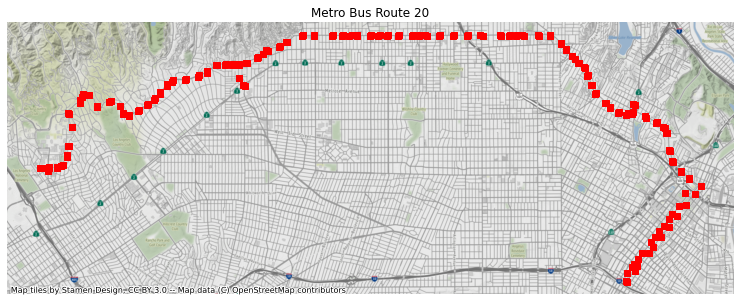

In [7]:
# map it
fig, ax = plt.subplots(figsize=(15,5))

gdf_web_mercator.plot(ax=ax, marker='s', color='red')

ax.axis('off')

ax.set_title('Metro Bus Route 20')

ctx.add_basemap(ax)

Nice. What makes this process **powerful**? And what are potential **pitfalls**?

## Data acquisition

Many governments use <a href="https://dev.socrata.com/" target="_blank">socrata</a> as their platform to serve data to the public. 
<img src="../images/socrata.png" width=600>

<table>
    <tr>
        <td><a href="https://opendata.cityofnewyork.us/" target="_blank"><img src="images/ny.png" width=400></a></td>
        <td><a href="https://datasf.org/opendata/" target="_blank"><img src="images/sf.png" width=400></a></td>
    </tr>
    <tr>
        <td><a href="https://data.cityofchicago.org/" target="_blank"><img src="images/ch.png" width=400></a></td>
        <td><a href="https://data.lacity.org/" target="_blank"><img src="images/la.png" width=400></a></td>
    </tr>
</table>

For this tutorial, we will look at LAPD's arrest data:

https://data.lacity.org/A-Safe-City/Arrest-Data-from-2020-to-Present/amvf-fr72

AR notes: Go to API tab on the top right, then click API docs -> it describes how to use that API

The <a href="https://dev.socrata.com/docs/endpoints.html" target="_blank">Socrata API</a> allows direct and real-time access to open data.

To access the data, we will use the `sodapy` library: https://github.com/xmunoz/sodapy

Instructions on how to use `sodapy` to access data for this dataset:

<a href="https://data.lacity.org/A-Safe-City/Arrest-Data-from-2020-to-Present/amvf-fr72" target="_blank"><img src="images/ladata.png"></a>

https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

### Question:
- What is the difference between exporting the data and using the API?

### It's time to start coding: importing libraries

Let's begin our python journey. First, we identify the libraries we will use, and import them into our project:
- `pandas`
- `plotly express` - [documentation](https://plotly.com/python/plotly-express/)
- `sodapy` - [documentation](https://github.com/xmunoz/sodapy)

*Notice that we will NOT be using geopandas! Don't worry, there will still be very rewarding maps in this session*

In [8]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

### Creating a socrata client
Next, we acquire the data using the socrata API. Use the socrata documentation to grab the code syntax for our crime data.
- https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

In [9]:
#AR: code copied from https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72
# connect to the data portal
client = Socrata("data.lacity.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("amvf-fr72", limit=2000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
df.sample(2)

rpt_id report_type                arst_date  time area area_desc    rd  \
1288  5950202     BOOKING  2020-06-06T00:00:00.000  2330   05    Harbor  0557   
1553  6018538     BOOKING  2020-09-24T00:00:00.000  1400   21   Topanga  2147   

     age sex_cd descent_cd  ... :@computed_region_ur2y_g4cx  \
1288  20      M          H  ...                         NaN   
1553  30      M          H  ...                         NaN   

     :@computed_region_kqwf_mjcx :@computed_region_2dna_qi2s chrg_grp_cd  \
1288                          15                          36          07   
1553                           4                          37          10   

         grp_description                         chrg_desc  \
1288       Vehicle Theft  TAKE VEHICLE W/O OWNER'S CONSENT   
1553  Fraud/Embezzlement         GET CREDIT/ETC OTHER'S ID   

                     bkg_date bkg_time       bgk_location bkg_loc_cd  
1288  2020-06-07T00:00:00.000     0031             HARBOR       4205  
1553  2020-09-24T00:00:00.000     1707  VALLEY - JAIL DIV       4279  

[2 rows x 31 columns]

## Import data based on a query string
That's great! But what if you wanted something specific, like "all arrests in November, 2020?"

In [10]:
# add a "where" statement
results = client.get("amvf-fr72", 
                     limit = 10000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "arst_date between '2020-11-01T00:00:00' and '2020-11-30T00:00:00'"
                    )
                    #using the where statement, need to write it the same way it's written in data. need to look at documentation

In [11]:
# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

## Data Exploration and Analysis

In [22]:
# how many rows and columns?
df.shape

(4228, 25)

In [23]:
# what fields and datatypes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4228 non-null   object
 1   report_type      4228 non-null   object
 2   arst_date        4228 non-null   object
 3   time             4228 non-null   object
 4   area             4228 non-null   object
 5   area_desc        4228 non-null   object
 6   rd               4228 non-null   object
 7   age              4228 non-null   object
 8   sex_cd           4228 non-null   object
 9   descent_cd       4228 non-null   object
 10  chrg_grp_cd      4009 non-null   object
 11  grp_description  4009 non-null   object
 12  arst_typ_cd      4228 non-null   object
 13  charge           4228 non-null   object
 14  chrg_desc        4012 non-null   object
 15  dispo_desc       3399 non-null   object
 16  location         4228 non-null   object
 17  crsst            2145 non-null   

In [25]:
# what are the first 5 rows?
df.head(5)

rpt_id report_type                arst_date  time area   area_desc  \
0    6044236     BOOKING  2020-11-01T00:00:00.000  1900   04  Hollenbeck   
1    6044361     BOOKING  2020-11-01T00:00:00.000  2042   06   Hollywood   
2  201916444         RFC  2020-11-01T00:00:00.000  1610   19     Mission   
3    6044329     BOOKING  2020-11-01T00:00:00.000  2145   04  Hollenbeck   
4    5860203     BOOKING  2020-11-01T00:00:00.000  0150   02     Rampart   

     rd age sex_cd descent_cd  ...                     dispo_desc  \
0  0437  32      M          H  ...         FELONY COMPLAINT FILED   
1  0647  28      M          B  ...                            NaN   
2  1984  46      M          H  ...    MISDEMEANOR COMPLAINT FILED   
3  0408  27      M          H  ...  849(B)(1) PC/TECHNICAL ARREST   
4  0261  25      M          H  ...    MISDEMEANOR COMPLAINT FILED   

                                  location   crsst      lat        lon  \
0                                 BROADWAY  SOLANO  34.0689  -118.1878   
1                                    SELMA    VINE  34.0998  -118.3267   
2                                PARTHENIA  CEDROS  34.2281  -118.4535   
3  3600 N  LOCKE                        AV     NaN  34.0874  -118.1797   
4  2200 W  8TH                          ST     NaN  34.0554  -118.2789   

                                          location_1                 bkg_date  \
0  {'type': 'Point', 'coordinates': [-118.1878, 3...  2020-11-01T00:00:00.000   
1  {'type': 'Point', 'coordinates': [-118.3267, 3...  2020-11-02T00:00:00.000   
2  {'type': 'Point', 'coordinates': [-118.4535, 3...                      NaN   
3  {'type': 'Point', 'coordinates': [-118.1797, 3...  2020-11-02T00:00:00.000   
4  {'type': 'Point', 'coordinates': [-118.2789, 3...  2020-11-01T00:00:00.000   

  bkg_time           bgk_location bkg_loc_cd  
0     2207  METRO - JAIL DIVISION       4273  
1     0200              HOLLYWOOD       4206  
2      NaN                    NaN        NaN  
3     0057  METRO - JAIL DIVISION       4273  
4     0430  METRO - JAIL DIVISION       4273  

[5 rows x 25 columns]

### Bar charts with plotly

Now, use plotly express to create a bar chart.

- https://plotly.com/python/bar-charts/

What are the differences between matplotlib and plotly?

In [12]:
# a simple bar chart, putting date on the x-axis
px.bar(df,
       x='arst_date',
       title='LAPD Arrests by Charge Type in November, 2020'
      )

## Label axis

In plotly, you can relabel text by providing a dictionary as shown below:

In [13]:
# add labels by providing a dict
px.bar(df,
       x='arst_date',
       title='LAPD Arrests by Charge Type in November, 2020',
       labels={'arst_date':'Arrest date','count':'Number of arrests'}
      )

Let's dig in further... what if we want to see the distribution of charge types by day?

In [14]:
# show me distinct value of charges
df.grp_description.unique().tolist()

['Burglary',
 'Aggravated Assault',
 nan,
 'Other Assaults',
 'Driving Under Influence',
 'Miscellaneous Other Violations',
 'Vehicle Theft',
 'Larceny',
 'Weapon (carry/poss)',
 'Moving Traffic Violations',
 'Drunkeness',
 'Narcotic Drug Laws',
 'Robbery',
 'Forgery/Counterfeit',
 'Against Family/Child',
 'Fraud/Embezzlement',
 'Disorderly Conduct',
 'Liquor Laws',
 'Rape',
 'Sex (except rape/prst)',
 'Receive Stolen Property',
 'Homicide',
 'Prostitution/Allied',
 'Disturbing the Peace',
 'Federal Offenses',
 'Non-Criminal Detention',
 'Pre-Delinquency',
 'Gambling']

In [19]:
# show me distinct value of charges
arrest_by_charge = df.grp_description.value_counts().reset_index()
arrest_by_charge

index  grp_description
0   Miscellaneous Other Violations              576
1               Aggravated Assault              564
2          Driving Under Influence              477
3                   Other Assaults              404
4               Narcotic Drug Laws              321
5              Weapon (carry/poss)              312
6                    Vehicle Theft              278
7                         Burglary              140
8              Prostitution/Allied              130
9                          Larceny              127
10       Moving Traffic Violations              126
11                         Robbery              117
12                     Liquor Laws              106
13            Against Family/Child               80
14              Disorderly Conduct               61
15                      Drunkeness               37
16          Sex (except rape/prst)               29
17              Fraud/Embezzlement               27
18         Receive Stolen Property               25
19             Forgery/Counterfeit               18
20                        Homicide               17
21                            Rape               14
22          Non-Criminal Detention               13
23            Disturbing the Peace                6
24                 Pre-Delinquency                2
25                        Gambling                1
26                Federal Offenses                1

In [20]:
# rename the columns
arrest_by_charge.columns=['charge','count']
arrest_by_charge

charge  count
0   Miscellaneous Other Violations    576
1               Aggravated Assault    564
2          Driving Under Influence    477
3                   Other Assaults    404
4               Narcotic Drug Laws    321
5              Weapon (carry/poss)    312
6                    Vehicle Theft    278
7                         Burglary    140
8              Prostitution/Allied    130
9                          Larceny    127
10       Moving Traffic Violations    126
11                         Robbery    117
12                     Liquor Laws    106
13            Against Family/Child     80
14              Disorderly Conduct     61
15                      Drunkeness     37
16          Sex (except rape/prst)     29
17              Fraud/Embezzlement     27
18         Receive Stolen Property     25
19             Forgery/Counterfeit     18
20                        Homicide     17
21                            Rape     14
22          Non-Criminal Detention     13
23            Disturbing the Peace      6
24                 Pre-Delinquency      2
25                        Gambling      1
26                Federal Offenses      1

In [21]:
# plot it
px.bar(arrest_by_charge,
       x='charge',
       y='count',
       title='LAPD Arrests by Charge Type in November, 2020')

Now it's your turn!

Create a [horizontal chart](https://plotly.com/python/horizontal-bar-charts/) for the same data.

### Stacked bar charts

What if you wanted to find out the distribution of crime types per day?

In [26]:
# show me how many arrests per day 
df.groupby(['arst_date']).count()

#AR notes: return how many records are not null for each column. That's why some rows may have 151, and the other has 144

rpt_id  report_type  time  area  area_desc   rd  age  \
arst_date                                                                       
2020-11-01T00:00:00.000     151          151   151   151        151  151  151   
2020-11-02T00:00:00.000     118          118   118   118        118  118  118   
2020-11-03T00:00:00.000     160          160   160   160        160  160  160   
2020-11-04T00:00:00.000     124          124   124   124        124  124  124   
2020-11-05T00:00:00.000     131          131   131   131        131  131  131   
2020-11-06T00:00:00.000     128          128   128   128        128  128  128   
2020-11-07T00:00:00.000     107          107   107   107        107  107  107   
2020-11-08T00:00:00.000     105          105   105   105        105  105  105   
2020-11-09T00:00:00.000     114          114   114   114        114  114  114   
2020-11-10T00:00:00.000     133          133   133   133        133  133  133   
2020-11-11T00:00:00.000     143          143   143   143        143  143  143   
2020-11-12T00:00:00.000     190          190   190   190        190  190  190   
2020-11-13T00:00:00.000     170          170   170   170        170  170  170   
2020-11-14T00:00:00.000     147          147   147   147        147  147  147   
2020-11-15T00:00:00.000     148          148   148   148        148  148  148   
2020-11-16T00:00:00.000     178          178   178   178        178  178  178   
2020-11-17T00:00:00.000     130          130   130   130        130  130  130   
2020-11-18T00:00:00.000     180          180   180   180        180  180  180   
2020-11-19T00:00:00.000     176          176   176   176        176  176  176   
2020-11-20T00:00:00.000     137          137   137   137        137  137  137   
2020-11-21T00:00:00.000     145          145   145   145        145  145  145   
2020-11-22T00:00:00.000     131          131   131   131        131  131  131   
2020-11-23T00:00:00.000     126          126   126   126        126  126  126   
2020-11-24T00:00:00.000     186          186   186   186        186  186  186   
2020-11-25T00:00:00.000     151          151   151   151        151  151  151   
2020-11-26T00:00:00.000      91           91    91    91         91   91   91   
2020-11-27T00:00:00.000     135          135   135   135        135  135  135   
2020-11-28T00:00:00.000     150          150   150   150        150  150  150   
2020-11-29T00:00:00.000     114          114   114   114        114  114  114   
2020-11-30T00:00:00.000     129          129   129   129        129  129  129   

                         sex_cd  descent_cd  chrg_grp_cd  ...  dispo_desc  \
arst_date                                                 ...               
2020-11-01T00:00:00.000     151         151          144  ...         130   
2020-11-02T00:00:00.000     118         118          114  ...          95   
2020-11-03T00:00:00.000     160         160          159  ...         139   
2020-11-04T00:00:00.000     124         124          122  ...         108   
2020-11-05T00:00:00.000     131         131          123  ...         110   
2020-11-06T00:00:00.000     128         128          124  ...         104   
2020-11-07T00:00:00.000     107         107          105  ...          92   
2020-11-08T00:00:00.000     105         105          100  ...          92   
2020-11-09T00:00:00.000     114         114          107  ...          89   
2020-11-10T00:00:00.000     133         133          130  ...         112   
2020-11-11T00:00:00.000     143         143          139  ...         126   
2020-11-12T00:00:00.000     190         190          173  ...         152   
2020-11-13T00:00:00.000     170         170          156  ...         142   
2020-11-14T00:00:00.000     147         147          142  ...         118   
2020-11-15T00:00:00.000     148         148          133  ...         125   
2020-11-16T00:00:00.000     178         178          173  ...         142   
2020-11-17T00:00:00.000     130         130   

Why so many columns and numbers? 

The `groupby` function is very powerful. You can group by multiple columns. Here, we create a new variable to find arrest types for each day of the month. Also notice that we are only outputting the `rpt_id` column, the unique identifyer.

- [pandas groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [27]:
# ok, group by date and charge, and let's get a count for each
df_grouped=df.groupby(['arst_date','grp_description']).count()[['rpt_id']] #AR notes: this outputs only that column
df_grouped.head(50)

rpt_id
arst_date               grp_description                       
2020-11-01T00:00:00.000 Against Family/Child                 1
                        Aggravated Assault                  29
                        Burglary                             2
                        Disorderly Conduct                   1
                        Driving Under Influence             29
                        Drunkeness                           1
                        Forgery/Counterfeit                  2
                        Fraud/Embezzlement                   1
                        Larceny                              3
                        Miscellaneous Other Violations      21
                        Moving Traffic Violations            3
                        Narcotic Drug Laws                  11
                        Other Assaults                      17
                        Robbery                              4
                        Vehicle Theft                        8
                        Weapon (carry/poss)                 11
2020-11-02T00:00:00.000 Against Family/Child                 3
                        Aggravated Assault                  14
                        Burglary                             7
                        Driving Under Influence             14
                        Drunkeness                           2
                        Fraud/Embezzlement                   1
                        Larceny                              2
                        Liquor Laws                          1
                        Miscellaneous Other Violations      17
                        Moving Traffic Violations            3
                        Narcotic Drug Laws                   5
                        Other Assaults                      19
                        Rape                                 2
                        Robbery                              3
                        Sex (except rape/prst)               1
                        Vehicle Theft                       10
                        Weapon (carry/poss)                 10
2020-11-03T00:00:00.000 Against Family/Child                 4
                        Aggravated Assault                  15
                        Burglary                             6
                        Disorderly Conduct                  31
                        Driving Under Influence             13
                        Drunkeness                           1
                        Forgery/Counterfeit                  2
                        Larceny                              4
                        Liquor Laws                          9
                        Miscellaneous Other Violations      21
                        Moving Traffic Violations            3
                        Narcotic Drug Laws                   9
                        Other Assaults                      17
                        Robbery                              6
                        Sex (except rape/prst)               3
                        Vehicle Theft                        6
                        Weapon (carry/poss)                  9

The result is a multi-level, multi-index dataframe! The `rpt_id` column in this output represents "how many records that were not null." Since we know that the `rpt_id` column has no nulls, this represents the count for each crime type per day.

In [28]:
# flatten the multi-index, multi-level dataframe
df_flat = df_grouped.reset_index()
df_flat

arst_date          grp_description  rpt_id
0    2020-11-01T00:00:00.000     Against Family/Child       1
1    2020-11-01T00:00:00.000       Aggravated Assault      29
2    2020-11-01T00:00:00.000                 Burglary       2
3    2020-11-01T00:00:00.000       Disorderly Conduct       1
4    2020-11-01T00:00:00.000  Driving Under Influence      29
..                       ...                      ...     ...
519  2020-11-30T00:00:00.000  Receive Stolen Property       1
520  2020-11-30T00:00:00.000                  Robbery       6
521  2020-11-30T00:00:00.000   Sex (except rape/prst)       3
522  2020-11-30T00:00:00.000            Vehicle Theft       7
523  2020-11-30T00:00:00.000      Weapon (carry/poss)      11

[524 rows x 3 columns]

In [29]:
# rename the rpt_id column to count
df_flat = df_flat.rename(columns={'rpt_id':'count'})

In [30]:
# make a bar chart
px.bar(df_flat,
       x='arst_date',
       y='count'
      )

In [31]:
# make a stacked bar chart
px.bar(df_flat,
       x='arst_date',
       y='count',
       color='grp_description' # this creates the "stack"
      )
###AR notes: can do this for air quality for my project

Now it's your turn!

* Add a title
* Clean up the labels (arst_date, grp_description, etc)

## Data prep: subsetting your data

Let's go back to the original dataset.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           4228 non-null   object
 1   report_type      4228 non-null   object
 2   arst_date        4228 non-null   object
 3   time             4228 non-null   object
 4   area             4228 non-null   object
 5   area_desc        4228 non-null   object
 6   rd               4228 non-null   object
 7   age              4228 non-null   object
 8   sex_cd           4228 non-null   object
 9   descent_cd       4228 non-null   object
 10  chrg_grp_cd      4009 non-null   object
 11  grp_description  4009 non-null   object
 12  arst_typ_cd      4228 non-null   object
 13  charge           4228 non-null   object
 14  chrg_desc        4012 non-null   object
 15  dispo_desc       3399 non-null   object
 16  location         4228 non-null   object
 17  crsst            2145 non-null   

That's a lot of fields. Let's create a subset of the data with just the following fields:

- `arst_date`
- `age`
- `descent_cd`
- `grp_description`
- `lat`
- `lon`


In [33]:
# subset the data below (don't forget to add .copy at the end)
df_mini = df[['arst_date', 'age', 'descent_cd', 'grp_description', 'lat', 'lon']].copy()

In [34]:
# get info for our subset data
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   arst_date        4228 non-null   object
 1   age              4228 non-null   object
 2   descent_cd       4228 non-null   object
 3   grp_description  4009 non-null   object
 4   lat              4228 non-null   object
 5   lon              4228 non-null   object
dtypes: object(6)
memory usage: 198.3+ KB


Our `lat` and `lon` columns need to be of data type float. Let's convert them.

In [35]:
# convert lat/lon's to floats
df_mini['lat'] = df_mini['lat'].astype(float)
df_mini['lon'] = df_mini['lon'].astype(float)
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   arst_date        4228 non-null   object 
 1   age              4228 non-null   object 
 2   descent_cd       4228 non-null   object 
 3   grp_description  4009 non-null   object 
 4   lat              4228 non-null   float64
 5   lon              4228 non-null   float64
dtypes: float64(2), object(4)
memory usage: 198.3+ KB


What happens if we create a scatter plot, placing `lon` in the x-axis `lat` in the y-axis?

In [36]:
px.scatter(df_mini,
           x='lon',
           y='lat'
          )

Uh oh. We have an outlier. What is it?

In [37]:
# identify the outlier
df_mini[df_mini.lon == 0]

arst_date age descent_cd          grp_description  lat  \
1813  2020-11-14T00:00:00.000  30          B  Driving Under Influence  0.0   

      lon  
1813  0.0

In [38]:
# in order to drop the outlier, we can "keep" the other rows
df_mini = df_mini[df_mini.lon != 0]

#AR: essentially saying: give me everything that's not 0

In [39]:
# check the plot again
px.scatter(df_mini,
           x='lon',
           y='lat'
          )

## Data visualization: Mapping with plotly
Plotly has support for a mapbox slippy map. Have fun with this, and change the `mapbox_style` attribute to any of the following:

* `open-street-map`
* `white-bg`
* `carto-positron`
* `carto-darkmatter`
* `stamen-terrain`
* `stamen-toner`
* `stamen-watercolor`


In [40]:
fig = px.scatter_mapbox(df_mini,
                        lat='lat',
                        lon='lon',
                        mapbox_style="stamen-terrain")
fig.show()

In [41]:
# before you run this cell, what do you think it will produce?
fig = px.scatter_mapbox(df_mini, 
                        lat="lat", 
                        lon="lon", 
                        color="descent_cd",
                        labels={'descent_cd':'Race'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

# Create a function

As "cool" as that map is, it's a jumbled mess. Too many dots of different colors, intermigled in a tight space. The end result? The map does not inform much of any value. Ideally, we would want to create a separate map per race category. We can do so by replicating the cell and changing the value for each category, but that process is *repetitive*. 

Welcome to the world of functions. According to [W3Schools](https://www.w3schools.com/python/python_functions.asp), a python function is:
* A function is a block of code which only runs when it is called.
* You can pass data, known as parameters, into a function.
* A function can return data as a result.

In other words, you create a function (a block of code that does something), and it remains dormant until you call on it. For this lab, let's create a function that creates a map for each race category.

In [42]:
# first, let's make this function together
def your_name():    
    print('My name is Aziz')

#AR notes below
#def: defines the function
#in python when there's a colon (:)-> next line of cod needs to be indented

In [43]:
# call it
your_name()

My name is Aziz


In [44]:
# modify the function to accept arguments
def your_name(name):
    print('My name is ' + name)
    
#AR notes
#arguments = name

In [45]:
# call it
your_name()

TypeError: your_name() missing 1 required positional argument: 'name'

In [46]:
# call it correctly
your_name('Casey')

# or (does the same thing)
your_name(name='Ashley')

My name is Casey
My name is Ashley


In [47]:
# add additional parameters
def your_name(firstname, lastname):
    print('My name is ' + firstname + ' ' + lastname)

In [48]:
your_name('Matt','Phillips')

My name is Matt Phillips


In [49]:
# provide default values
def your_name(firstname = 'Michael', lastname = 'Jordan'):
    print('My name is ' + firstname + ' ' + lastname)

#default values of Michael Jordan means that we don't have to add name to the 'your_name()'
#if we run the code as 'your_name()', without adding a value inside (), then it will print the default

In [50]:
# call it with no arguments
your_name()

My name is Michael Jordan


In [51]:
# call it with one argument
your_name(firstname = 'Arturo')

My name is Arturo Jordan


Do you have the hang of it now? Aren't functions *fun*?

Look at the function below, and see if you can figure out what it is meant to do:

In [52]:
def race_map(race='H'):
    
    fig = px.scatter_mapbox(df_mini[df_mini.descent_cd==race], 
                            lat="lat", 
                            lon="lon", 
                            color="descent_cd",
                            labels={'descent_cd':'Race'}
                           )

    fig.update_layout(mapbox_style="carto-darkmatter")

    fig.show()

In [53]:
# call the function (try other values)
race_map(race='B')

## Bonus: interactive dropdowns


In [54]:
from ipywidgets import interact

In [55]:
race_list = df_mini.descent_cd.unique().tolist()
race_list

#creates list of all unique values for race

['H', 'B', 'W', 'O', 'C', 'I', 'A', 'K', 'X']

In [56]:
@interact
def race_map(race=race_list):
    
    fig = px.scatter_mapbox(df_mini[df_mini.descent_cd==race], 
                            lat="lat", 
                            lon="lon", 
                            color="descent_cd",
                            labels={'descent_cd':'Race'}
                           )

    fig.update_layout(mapbox_style="carto-darkmatter")

    fig.show()

interactive(children=(Dropdown(description='race', options=('H', 'B', 'W', 'O', 'C', 'I', 'A', 'K', 'X'), valu…

## Advanced visualizations: 3D mapping
- https://kepler.gl/

<img src="images/kepler.png" width=800>

Import the keplergl library.

In [57]:
from keplergl import KeplerGl

Create a default kepler map.

In [58]:
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

Add our `df_mini` as a data layer on the map. Within the kepler widget, manipulate the map 
- change points to grid cells or hexbins
- change the color palette so that hot spots are red
- change the color scale from `quantile` to `quansize`
- add height to your data
- switch to 3D map view
- adjust the height of the data cells
- add `arst_date` as a filter

In [59]:
map.add_data(data=df_mini,name='arrests')

### Saving your kepler map as an html page

In [ ]:
map.save_to_html(file_name='la_arrests.html',read_only=True)

<div class="alert alert-info">
Now it's your turn!

* Find a socrata based open dataset
* Use the sodapy library and import it
* Conduct data exploration and analysis
* Create two or more plots using the plotly express library
* Create map visualization using plotly and/or the KeplerGL libraries
* Submit your results to our [Week 5 Gallery Google Doc](https://docs.google.com/document/d/1-l3roBF-234txMJyMDft-KTDzd0p6K10NTGFKvIhaEc/edit?usp=sharing)

</div>